In [0]:
#Este programa é utilizado para o desenvolvimento do trabalho prático da disciplina FAM do bootcamp de MLE

In [1]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos


In [7]:
#from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
#uploaded = files.upload()
#Realizei o trabalho na minha maquina

Saving data.csv to data.csv


In [2]:
#realizando a leitura do arquivo (dataset)
nome_do_arquivo="./data/data.csv"
dataframe_envio_portos= pd.read_csv(nome_do_arquivo)

In [3]:
#apresentando as 5 primeiras linhas do dataset
dataframe_envio_portos.head()

,valid_import,item,importer_id,exporter_id,country_of_origin,declared_quantity,declared_cost,mode_of_transport,route,date_of_departure,date_of_arrival,declared_weight,actual_weight,days_in_transit
0,True,cigar,111,222,India,129,3784.402551,sea,asia,04/25/2019,05/13/2019,1608.605135,1637.661221,18.232857
1,True,cigar,111,222,India,104,3081.350806,sea,america,04/22/2019,05/24/2019,831.719301,848.273419,32.436029
2,True,cigar,111,222,India,130,4414.125741,sea,europe,04/29/2019,05/16/2019,1527.704165,1582.063911,16.996206
3,True,cigar,111,222,India,143,2533.535991,sea,panama,05/05/2019,05/25/2019,1138.680563,1179.993817,19.965886
4,True,cigar,111,222,China,141,4396.397887,sea,asia,05/14/2019,06/05/2019,761.744581,781.735080,22.160034


In [4]:
dataframe_envio_portos.info() #verificando os tipos de variáveis e se existem ou não valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valid_import       120 non-null    bool   
 1   item               120 non-null    object 
 2   importer_id        120 non-null    int64  
 3   exporter_id        120 non-null    int64  
 4   country_of_origin  120 non-null    object 
 5   declared_quantity  120 non-null    int64  
 6   declared_cost      120 non-null    float64
 7   mode_of_transport  120 non-null    object 
 8   route              120 non-null    object 
 9   date_of_departure  120 non-null    object 
 10  date_of_arrival    120 non-null    object 
 11  declared_weight    120 non-null    float64
 12  actual_weight      120 non-null    float64
 13  days_in_transit    120 non-null    float64
dtypes: bool(1), float64(4), int64(3), object(6)
memory usage: 12.4+ KB


**Existem Colunas Com Valores Nulos?**

In [21]:
dataframe_envio_portos.shape

(120, 14)

**Quantas Instâncias e Características Existem no Dataset?**



In [5]:
#analisando a "estatística" do dataset
dataframe_envio_portos.describe()

,importer_id,exporter_id,declared_quantity,declared_cost,declared_weight,actual_weight,days_in_transit
count,120.0,120.0,120.000000,120.000000,120.000000,120.000000,120.000000
mean,111.0,222.0,127.458333,6743.649881,1264.702934,1306.429806,35.424705
std,0.0,0.0,14.641311,2991.797050,633.149971,656.911704,26.571591
min,111.0,222.0,100.000000,1441.012419,18.459509,19.275241,12.410325
25%,111.0,222.0,115.750000,4442.903914,820.314400,841.763738,18.225625
50%,111.0,222.0,131.500000,6010.218745,1255.597743,1305.716419,27.044293
75%,111.0,222.0,139.000000,8887.095370,1711.314045,1763.681083,44.356374
max,111.0,222.0,149.000000,14281.325362,2806.338955,2918.681683,147.787560


**Qual é o Valor Médio Para os Pesos Declarados?**

<AxesSubplot:>

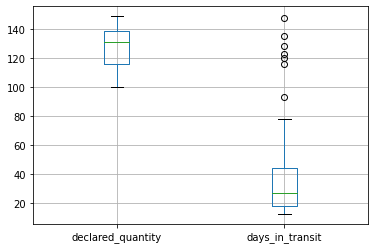

In [6]:
#identificando possíveis outliers
dataframe_envio_portos[['declared_quantity','days_in_transit']].boxplot()

**Existem Possíveis Outliers?**

In [7]:
#realizando a análise de regressão
x=dataframe_envio_portos['declared_weight'].values  #variável independente 
Y=dataframe_envio_portos['actual_weight'].values #variável dependente 

In [8]:
#importa o modelo de regressão linear univariada
from sklearn.linear_model import LinearRegression

In [9]:
#Realiza a construção do modelo de regressão
reg= LinearRegression()
x_Reshaped=x.reshape((-1, 1)) #coloca os dados no formato 2D
regressao= reg.fit (x_Reshaped,Y) # encontra os coeficientes (realiza a regressão)

In [10]:
#realiza a previsão
previsao=reg.predict(x_Reshaped)

In [11]:
#análise do modelo
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)

In [13]:
#parâmetros encontrados
print('Y = {} X {}'.format(reg.coef_,reg.intercept_))

R_2 = r2_score(Y, previsao)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)


Y = [1.03718115] X -5.296233030439225
Coeficiente de Determinação (R2): 0.9993288165644932


**Pelo Coefiente de Determinação, o Que É Possível Afirmar Sobre a Relação Entre as Variáveis Peso Real x Peso Declarado?**

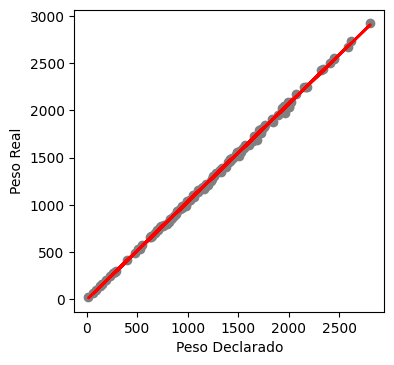

In [14]:
#realiza o plot dos dados
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(x, Y,  color='gray') #realiza o plot do gráfico de dispersão
plt.plot(x, previsao, color='red', linewidth=2) # realiza o plto da "linha"
plt.xlabel("Peso Declarado")
plt.ylabel("Peso Real")
plt.show()